In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
np.random.seed(42)

def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [7]:
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

C:\Users\Admin\AppData\Local\Temp\ipykernel_18904\447317223.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\Admin\AppData\Local\Temp\ipykernel_18904\447317223.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\Admin\AppData\Local\Temp\ipykernel_18904\447317223.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


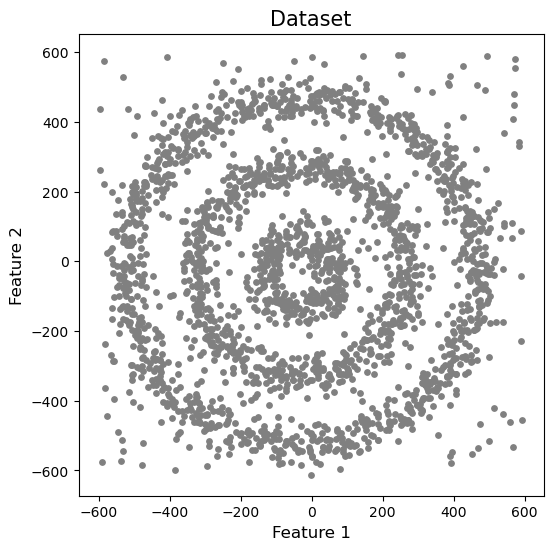

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color="grey")
plt.title('Dataset',fontsize=15)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(df[[0, 1]])

KMeans(n_clusters=4, random_state=42)

In [13]:
df['KMeans_labels'] = kmeans.labels_

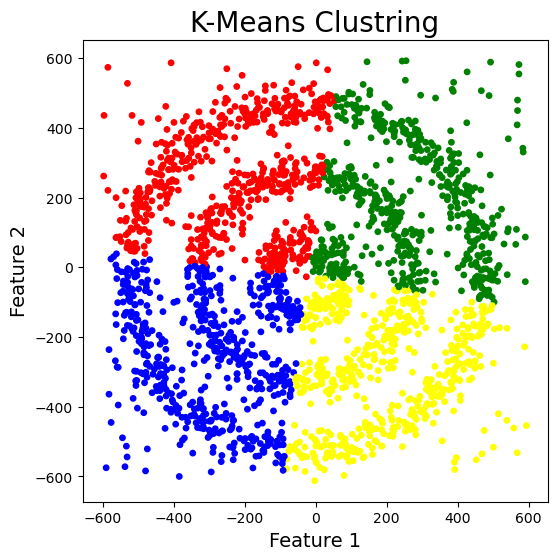

In [17]:
import matplotlib
colors = ['yellow', 'red', 'blue', 'green']
plt.figure(figsize = (6,6))
plt.scatter(df[0], df[1], c=df['KMeans_labels'], cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('K-Means Clustring', fontsize =20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering


In [19]:
model = AgglomerativeClustering(n_clusters = 4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

In [20]:
df['HR_labels'] = model.labels_

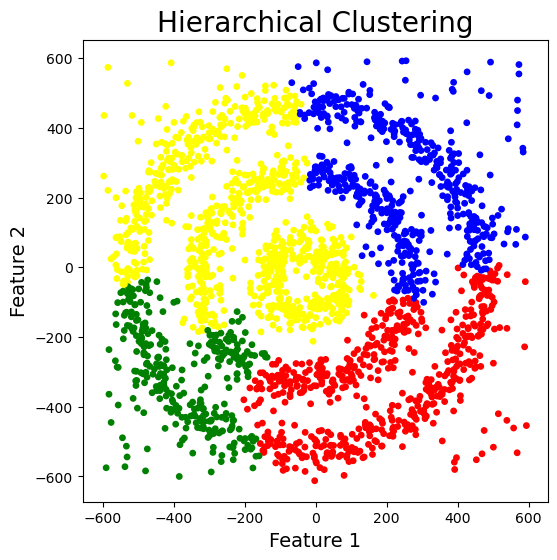

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c=df['HR_labels'], cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [24]:
from sklearn.cluster import DBSCAN

In [26]:
dbscan = DBSCAN(eps=30, min_samples=6)
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [28]:
df['DBSCAN_opt_labels'] = dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

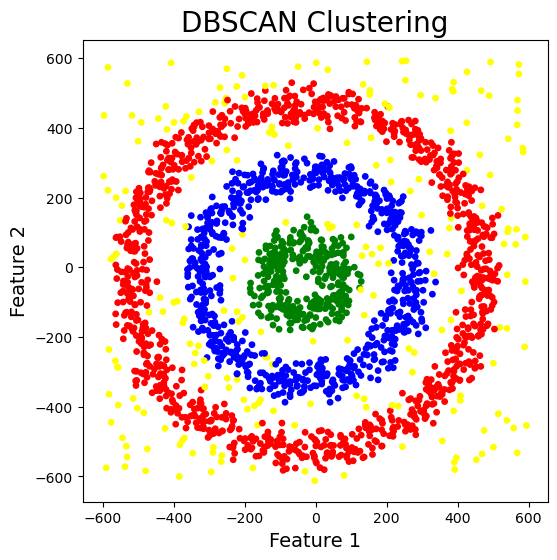

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c=df['DBSCAN_opt_labels'], cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()